In [6]:
import pandas as pd
import re

This assumes that you already have a subset loaded as a cv and in the same directory as this notebook.

In [7]:
filename = "millionsong_subset.csv"
subset = pd.read_csv(filename)

In [8]:
subset.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,year
0,22050,165270,0.581794,0.401998,b'ARD7TVE1187B99BFB1',NaN,b'California - LA',NaN,b'e77e51a5-4761-45b3-9847-2051f811e366',"(0,)",...,218.932,"(688,)","(688,)",92.198,4,0.778,"b""I Didn't Mean To""",3401791,b'TRAAAAW128F429D538',0
1,22050,1998,0.630630,0.417500,b'ARMJAGH1187FB546F3',35.14968,"b'Memphis, TN'",-90.04892,b'1c78ab62-db33-4433-8d0b-7c8dcf1849c2',"(1,)",...,137.915,"(591,)","(591,)",121.274,4,0.384,b'Soul Deep',3400270,b'TRAAABD128F429CF47',1969
2,22050,290021,0.487357,0.343428,b'ARKRRTF1187B9984DA',NaN,b'',NaN,b'7a273984-edd9-4451-9c4d-39b38f05ebcd',"(0,)",...,172.304,"(582,)","(582,)",100.070,1,0.000,b'Amor De Cabaret',5703798,b'TRAAADZ128F9348C2E',0
3,22050,19072,0.630382,0.454231,b'AR7G5I41187FB4CE6C',NaN,"b'London, England'",NaN,b'e188a520-9cb7-4f73-a3d7-2f70c6538e92',"(3,)",...,217.124,"(924,)","(924,)",119.293,4,0.000,b'Something Girls',3226795,b'TRAAAEF128F4273421',1982
4,22050,30973,0.651046,0.401724,b'ARXR32B1187FB57099',NaN,b'',NaN,b'c6903a2e-063c-4f91-a284-17b8f421be7b',"(0,)",...,198.699,"(887,)","(887,)",129.738,4,0.562,b'Face the Ashes',6795666,b'TRAAAFD128F92F423A',2007


Doing a quick rundown of columns where the majority of the values are NaN, or the overwhelming majority of the values are the same. I also found that a few of the columns are just artist IDs for other websites. These are unlikely to be helpful, so I just removed all of those. 

In [11]:
#Finding columns where the majority of the values are NA.
def find_nas(subset,threshold=0.5): 
    nalist = []
    for col in subset.columns: 
        numna = subset[subset[col].isna() == True]
        proportion = numna.shape[0]/subset.shape[0]
        if proportion >= threshold: 
            print(f"{numna.shape[0]}/{subset.shape[0]} of column {col} are nan. This is {round(numna.shape[0]/subset.shape[0] * 100,2)}%")
            nalist.append(col)
    return nalist

# Finding columns where the majority of the values are identical
def find_common_vals(subset, threshold = 0.9):
    subcop = subset.copy()
    cols = subcop.columns
    iffy_list = []
    subcop['dummy'] = 1
    for col in cols: 
        groupset = subcop.groupby(col).count().sort_values(col,ascending=False)
        common = groupset['dummy'].iloc[0]
        commonprop = common/subset.shape[0]
        commonrow = list(groupset['dummy'].index)[0]
        if commonprop >= threshold: 
            print(f"{common}/{subset.shape[0]} of {col} are {commonrow}. This is {round(commonprop*100,2)}%")
            iffy_list.append(col)
    return iffy_list

nalist = find_nas(subset)
iffy_list = find_common_vals(subset) 
unimportant = ['artist_mbid','artist_playmeid','artist_7digitalid'] # different IDs for the same artist, just used by different sites

ignore_list = nalist + iffy_list + unimportant

6258/10000 of column artist_latitude are nan. This is 62.58%
6258/10000 of column artist_longitude are nan. This is 62.58%
10000/10000 of analysis_sample_rate are 22050. This is 100.0%
10000/10000 of danceability are 0.0. This is 100.0%
10000/10000 of energy are 0.0. This is 100.0%
10000/10000 of similar_artists are (100,). This is 100.0%


In [12]:
usable_columns = [col for col in subset.columns if col not in ignore_list]
usable_subset = subset[usable_columns]

usable_subset.head(5)

,artist_familiarity,artist_hotttnesss,artist_id,artist_location,artist_mbtags,artist_mbtags_count,artist_name,artist_terms,artist_terms_freq,artist_terms_weight,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,year
0,0.581794,0.401998,b'ARD7TVE1187B99BFB1',b'California - LA',"(0,)","(0,)",b'Casual',"(37,)","(37,)","(37,)",...,218.932,"(688,)","(688,)",92.198,4,0.778,"b""I Didn't Mean To""",3401791,b'TRAAAAW128F429D538',0
1,0.630630,0.417500,b'ARMJAGH1187FB546F3',"b'Memphis, TN'","(1,)","(1,)",b'The Box Tops',"(38,)","(38,)","(38,)",...,137.915,"(591,)","(591,)",121.274,4,0.384,b'Soul Deep',3400270,b'TRAAABD128F429CF47',1969
2,0.487357,0.343428,b'ARKRRTF1187B9984DA',b'',"(0,)","(0,)",b'Sonora Santanera',"(10,)","(10,)","(10,)",...,172.304,"(582,)","(582,)",100.070,1,0.000,b'Amor De Cabaret',5703798,b'TRAAADZ128F9348C2E',0
3,0.630382,0.454231,b'AR7G5I41187FB4CE6C',"b'London, England'","(3,)","(3,)",b'Adam Ant',"(43,)","(43,)","(43,)",...,217.124,"(924,)","(924,)",119.293,4,0.000,b'Something Girls',3226795,b'TRAAAEF128F4273421',1982
4,0.651046,0.401724,b'ARXR32B1187FB57099',b'',"(0,)","(0,)",b'Gob',"(38,)","(38,)","(38,)",...,198.699,"(887,)","(887,)",129.738,4,0.562,b'Face the Ashes',6795666,b'TRAAAFD128F92F423A',2007


At this point I'm splitting up the columns that have important identifying information and those that contain useful information about the songs themselves. 

I'm splitting the non-id columns into numerical and object-based columns. Pandas doesn't do lists well, so I'm making a separate subset of columns whose values contain brackets/parentheses and calling those list_columns. 

In [13]:
id_cols = [col for col in usable_subset.columns if '_id' in col or 'digitalid' in col]
non_id_cols = [col for col in usable_subset.columns if '_id' not in col and 'digitalid' not in col]

value_subset = usable_subset[non_id_cols]

In [17]:
value_subset.columns

Index(['artist_familiarity', 'artist_hotttnesss', 'artist_location',
       'artist_mbtags', 'artist_mbtags_count', 'artist_name', 'artist_terms',
       'artist_terms_freq', 'artist_terms_weight', 'audio_md5',
       'bars_confidence', 'bars_start', 'beats_confidence', 'beats_start',
       'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'release', 'sections_confidence',
       'sections_start', 'segments_confidence', 'segments_loudness_max',
       'segments_loudness_max_time', 'segments_loudness_start',
       'segments_pitches', 'segments_start', 'segments_timbre',
       'song_hotttnesss', 'start_of_fade_out', 'tatums_confidence',
       'tatums_start', 'tempo', 'time_signature', 'time_signature_confidence',
       'title', 'year'],
      dtype='object')

In [14]:
number_columns = [col for col in value_subset.columns if value_subset.dtypes[col] != 'O']
number_subset = value_subset[number_columns]

object_columns = [col for col in value_subset.columns if value_subset.dtypes[col] == 'O']
object_subset = value_subset[object_columns]

list_columns = [col for col in object_columns if '[' in object_subset[col].iloc[0] or '(' in object_subset[col].iloc[0] ]
list_subset = object_subset[list_columns]

In [18]:
list_subset.columns

Index(['artist_mbtags', 'artist_mbtags_count', 'artist_terms',
       'artist_terms_freq', 'artist_terms_weight', 'bars_confidence',
       'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence',
       'sections_start', 'segments_confidence', 'segments_loudness_max',
       'segments_loudness_max_time', 'segments_loudness_start',
       'segments_pitches', 'segments_start', 'segments_timbre',
       'tatums_confidence', 'tatums_start'],
      dtype='object')

Some of the information in the list columns is about song genre, artist genre, or similar artists. I'm making a couple functions that will get lists of tags and sort them by how common they appear. 

In [15]:
def listify(instr): 
    outlist = []
    if type(instr) == str:
        rawlist = instr.split(',')
    else: 
        rawlist = instr
    pattern = r"[\'\"](.*)"
    for element in rawlist: 
        red_element = re.findall(pattern,element)
        if len(red_element) != 0: 
            red_element = red_element[0]
            cleaned_element = re.sub(r'[\"\'\]\[]','',red_element)
            outlist.append(cleaned_element)
    return outlist

def collect_list(use_col):
    out_dict = dict()
    for element in use_col: 
        listed_el = listify(element)
        for sub_element in listed_el: 
            if sub_element not in out_dict.keys(): 
                out_dict[sub_element] = 1
            else: 
                out_dict[sub_element] += 1
    return out_dict

def sort_genre(in_dict): 
    uselist = [(i,in_dict[i]) for i in in_dict]
    uselist = sorted(uselist, key = lambda x: -x[1])
    return uselist

artist_term_dict = collect_list(list_subset['artist_terms'])
artist_term_sorted = sort_genre(artist_term_dict)

artist_mbtags_dict = collect_list(list_subset['artist_mbtags'])
artist_mbtags_sorted = sort_genre(artist_mbtags_dict)

A (rudimentary, highly inefficient) function to return a list of commonly-suggested artists. 

In [16]:
def get_similar_artists(use_col,subset): 
    out_dict = dict()
    artist_dict = collect_list(use_col)
    i = 0
    total = len(artist_dict.keys())
    
    for artist_id in artist_dict.keys():
        i+= 1
        artist_name = subset[subset['artist_id'].str.contains(artist_id)]['artist_name']
        try: 
            artist_name = artist_name.iloc[0]
            out_dict[(artist_name,artist_id)] = artist_dict[artist_id]
        except:
            pass
        if i % 1000 == 0: 
            print(f"{i}/{total}")
    return out_dict

#The above function is EXTREMELY inefficient, and getting similar_artists for the first time will take a while.
#Only uncomment the below if you don't already have similar_artists loaded up
#similar_artists = get_similar_artists(subset['similar_artists'],subset)
backup_similar_artists = similar_artists
similar_artist_list = sort_genre(backup_similar_artists)

NameError: name 'similar_artists' is not defined

A quick summary of the numerical data. A lot of the numerical data here uses "0" as a null indicator, so we'll probably have to do something about that. 

In [422]:
summary_stats = ['min','max','median','mean','skew','std']
col_sum_dict = {i:summary_stats for i in number_columns}
number_subset.agg(col_sum_dict)

,artist_familiarity,artist_hotttnesss,song_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,year
min,0.000000,0.000000,0.000000,1.044440,0.000000,0.000000,0.000000,-51.643000,0.000000,0.000000,1.044000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.082503,1.000000,1819.767710,43.119000,11.000000,1.000000,0.566000,1.000000,1.000000,1813.426000,262.828000,7.000000,1.000000,2010.000000
median,0.563666,0.380742,0.360371,223.059140,0.199000,5.000000,0.469000,-9.380000,1.000000,0.487000,213.879000,120.161000,4.000000,0.551000,0.000000
mean,0.565456,0.385552,0.342822,238.507518,0.758616,5.276100,0.449573,-10.485668,0.691100,0.477784,229.975465,122.915449,3.564800,0.509937,934.704600
skew,-0.257758,-0.152285,-0.029363,3.379673,7.287469,-0.008369,-0.041943,-1.357837,-0.827326,-0.268088,3.473594,0.411232,-0.590469,-0.123147,0.128474
std,0.160161,0.143647,0.247220,114.137514,1.867952,3.554087,0.274974,5.399788,0.462063,0.191254,112.195735,35.184412,1.266239,0.373409,996.650657


Quick histograms of the different metrics. 

array([[<Axes: title={'center': 'artist_familiarity'}>,
        <Axes: title={'center': 'artist_hotttnesss'}>,
        <Axes: title={'center': 'song_hotttnesss'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'end_of_fade_in'}>,
        <Axes: title={'center': 'key_confidence'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode_confidence'}>,
        <Axes: title={'center': 'start_of_fade_out'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature_confidence'}>, <Axes: >]],
      dtype=object)

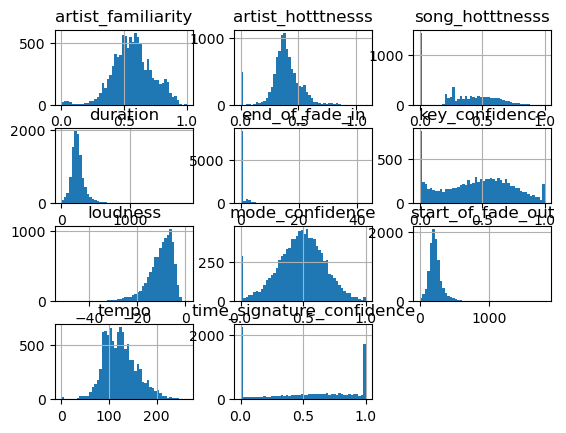

In [444]:
float_columns = [col for col in number_columns if number_subset.dtypes[col] != 'int64']
float_subset = subset[float_columns]
float_subset.hist(bins=50)

<Axes: >

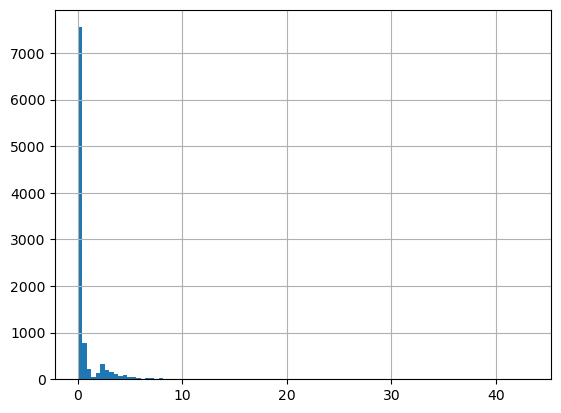

In [474]:
float_subset['end_of_fade_in'].hist(bins=100)

<Axes: >

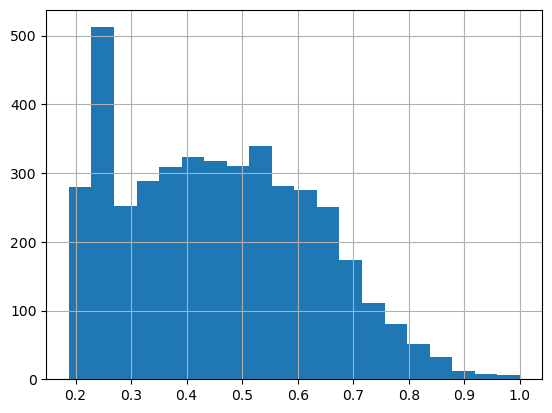

In [464]:
float_subset[float_subset['song_hotttnesss']!= 0]['song_hotttnesss'].hist(bins=20)

<Axes: >

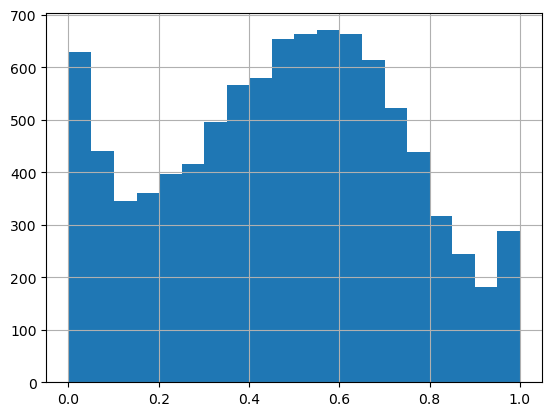

In [476]:
float_subset[float_subset['key_confidence']!= 0]['key_confidence'].hist(bins=20)

In [480]:
object_columns

['artist_location',
 'artist_name',
 'release',
 'title',
 'similar_artists',
 'artist_terms',
 'artist_terms_freq',
 'artist_terms_weight',
 'audio_md5',
 'segments_start',
 'segments_confidence',
 'segments_pitches',
 'segments_timbre',
 'segments_loudness_max',
 'segments_loudness_max_time',
 'segments_loudness_start',
 'sections_start',
 'sections_confidence',
 'beats_start',
 'beats_confidence',
 'bars_start',
 'bars_confidence',
 'tatums_start',
 'tatums_confidence',
 'artist_mbtags',
 'artist_mbtags_count']

In [482]:
list_columns

['similar_artists',
 'artist_terms',
 'artist_terms_freq',
 'artist_terms_weight',
 'segments_start',
 'segments_confidence',
 'segments_pitches',
 'segments_timbre',
 'segments_loudness_max',
 'segments_loudness_max_time',
 'segments_loudness_start',
 'sections_start',
 'sections_confidence',
 'beats_start',
 'beats_confidence',
 'bars_start',
 'bars_confidence',
 'tatums_start',
 'tatums_confidence',
 'artist_mbtags',
 'artist_mbtags_count']

In [492]:
similar_artist_list

[(("b'The Rolling Stones'", 'ARFCUN31187B9AD578'), 480),
 (("b'The Beatles'", 'AR6XZ861187FB4CECD'), 318),
 (("b'Led Zeppelin'", 'ARDIBRT1187B9AF176'), 316),
 (("b'T-Bone Walker'", 'AR8Q4RZ1187FB46BDC'), 270),
 (("b'Marty Robbins'", 'AR223M11187B9ADDD6'), 269),
 (("b'Sex Pistols'", 'ARD3LXU1187B9ABFC5'), 258),
 (("b'Sonny Landreth'", 'ARWEM1D1187FB4077B'), 251),
 (("b'Johnny Winter'", 'ARAOBIZ1187FB38574'), 231),
 (('b"Lightnin\' Hopkins"', 'ARIGKCK1187FB5C99B'), 227),
 (("b'The Stooges'", 'ARLR9U31187B9A71AD'), 225),
 (("b'Jimi Hendrix'", 'ARNDL191187FB51583'), 224),
 (("b'Faron Young'", 'ARKBTPV1187FB38A79'), 218),
 (("b'Ray Price'", 'ARXB4J91187B9A9C7D'), 218),
 (("b'Nirvana'", 'ARH3S5S1187FB4F76B'), 213),
 (("b'Freddie McGregor'", 'ARX5XTP1187FB3D8CC'), 208),
 (("b'Tammy Wynette'", 'ARM5JLS1187FB3615B'), 207),
 (("b'Gang Starr Featuring Jeru The Damaja And Lil Dap'",
   'ARDSWIE1187FB39056'),
  207),
 (("b'Stevie Ray Vaughan'", 'ART3O5Z1187B9AB043'), 206),
 (("b'Twila Paris'", 'ARU